### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import COLORS_DICT, get_colors
from plotting import Plotter

### Configs

In [2]:
data_path = './data'
plots_path = './plots'

# Data

In [3]:
plotter = Plotter(data_path=data_path, plots_path=plots_path)

### World-wide Social Protection Responses

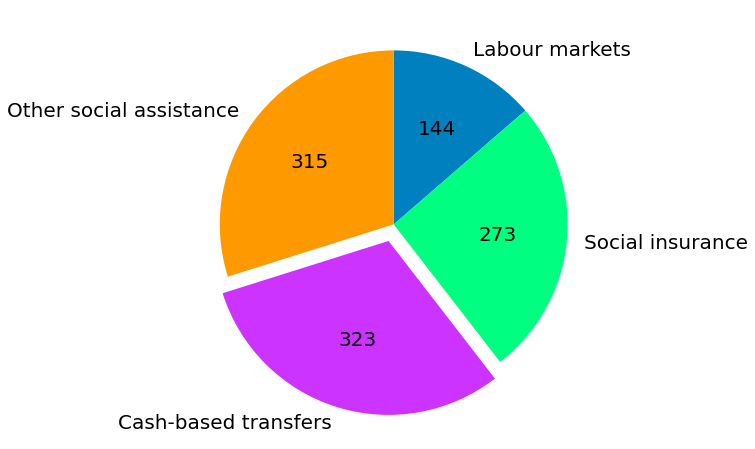

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

labels = ['Labour markets', 'Social insurance', 'Cash-based transfers', 'Other social assistance']
data = [144, 273, 323, 315]
total = sum(data)

ax.pie(x=data, labels=labels, colors=get_colors(COLORS_DICT), textprops={'fontsize': 20},
       autopct=lambda p:'{:.0f}'.format(p * total / 100),
       explode=(0, 0, 0.1, 0), counterclock=False, startangle=90)

plt.savefig(os.path.join(plots_path, 'protection_responses.pdf'))

plt.show()

### Payments in Brazil (_basic_, _min_, _max_)

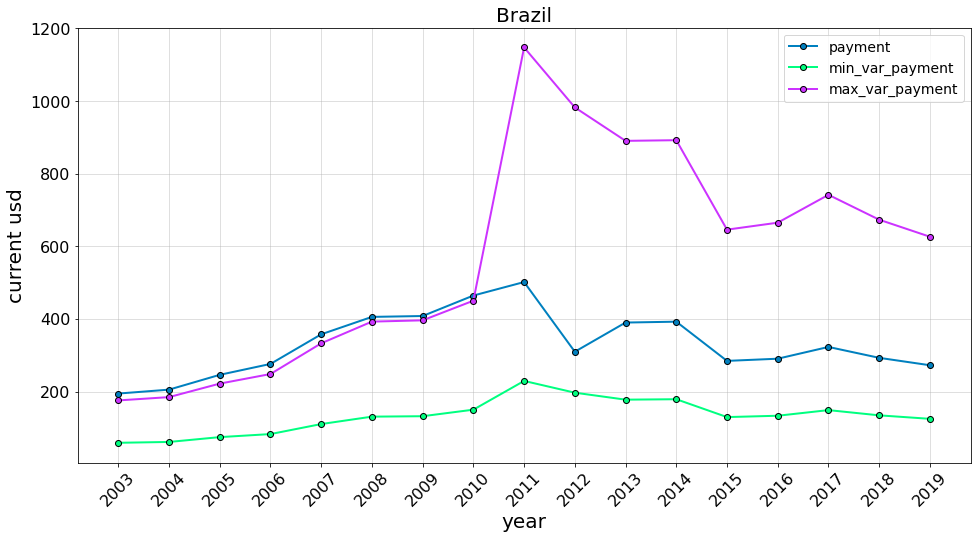

In [5]:
plotter.plot_indicators(region='Brazil',
                        indicators=['payment', 'min_var_payment', 'max_var_payment'],
                        crop=[2003, 2019],
                        colors=get_colors(COLORS_DICT),
                        save=False)

### Appendix C

#### Total and Transfer Costs

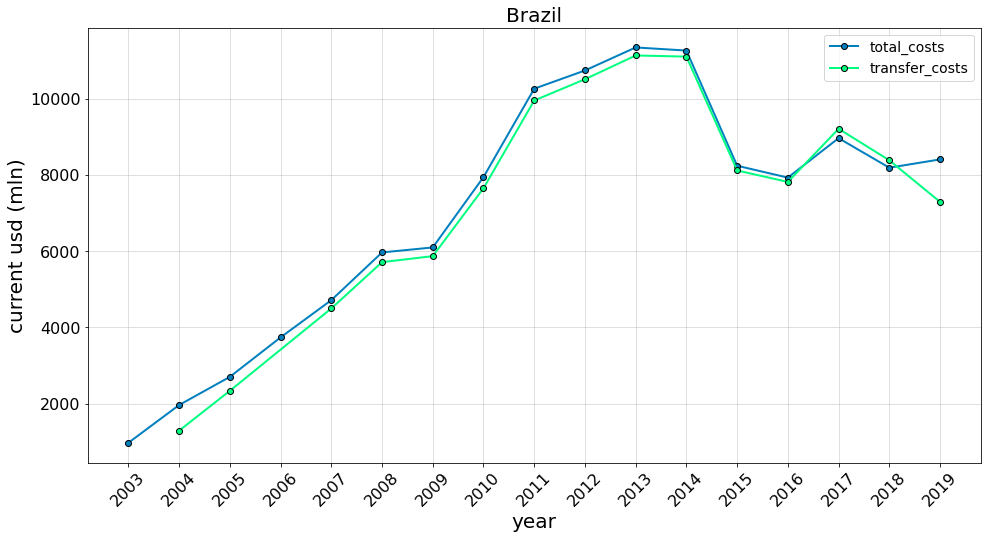

In [6]:
plotter.plot_indicators(region='Brazil',
                        indicators=['total_costs', 'transfer_costs'],
                        crop=[2003, 2019],
                        colors=get_colors(COLORS_DICT),
                        save=False)

#### Minimal Variable Bonus Subcategories

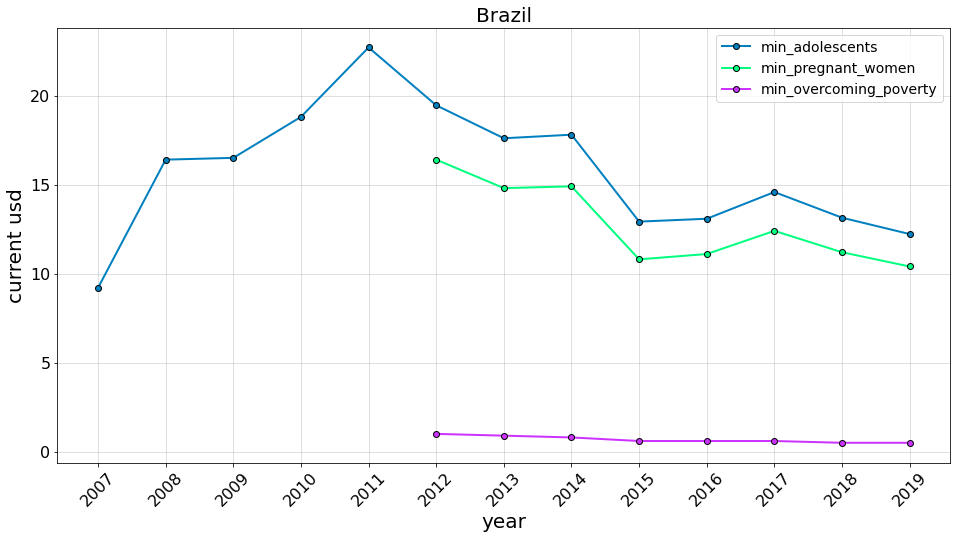

In [7]:
plotter.plot_indicators(region='Brazil',
                        indicators=['min_adolescents', 'min_pregnant_women', 'min_overcoming_poverty'],
                        crop=[2003, 2019],
                        colors=get_colors(COLORS_DICT),
                        save=False)

#### Maximal Variable Bonus Subcategories

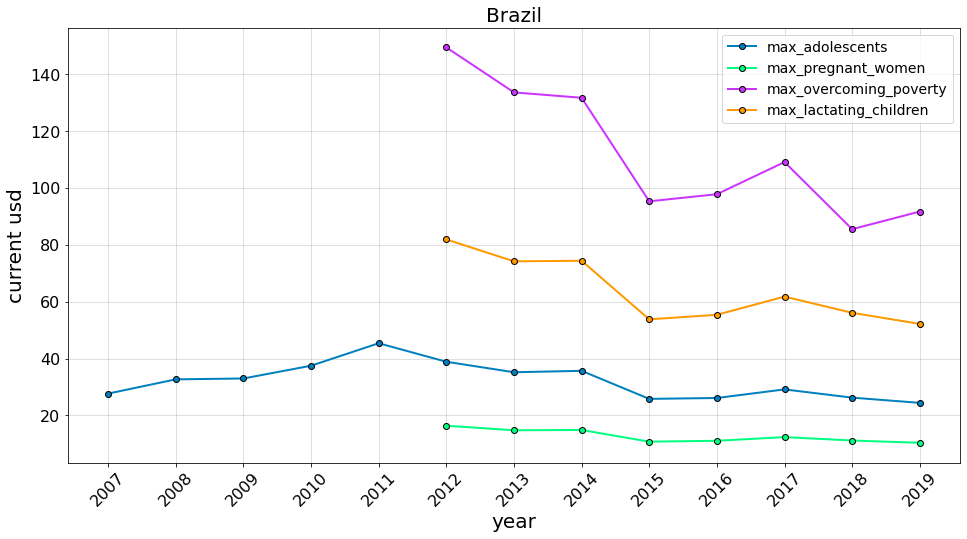

In [8]:
plotter.plot_indicators(region='Brazil',
                        indicators=['max_adolescents', 'max_pregnant_women',
                                    'max_overcoming_poverty', 'max_lactating_children'],
                        crop=[2003, 2019],
                        colors=get_colors(COLORS_DICT),
                        save=False)

### Minimum _vs._ Living Wage comparison

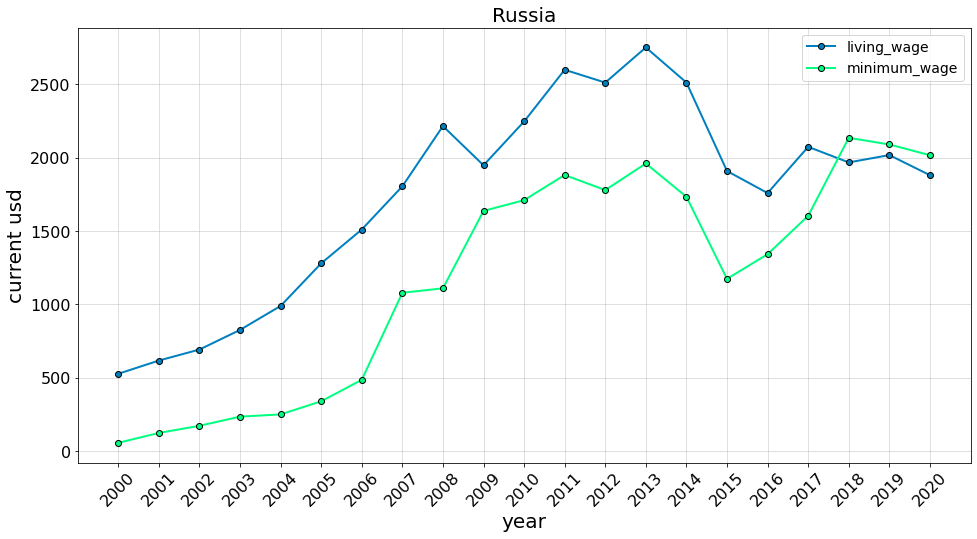

In [9]:
plotter.plot_indicators(region='Russia',
                        indicators=['living_wage', 'minimum_wage'],
                        colors=get_colors(COLORS_DICT),
                        save=False)

### Gini Index in Russia

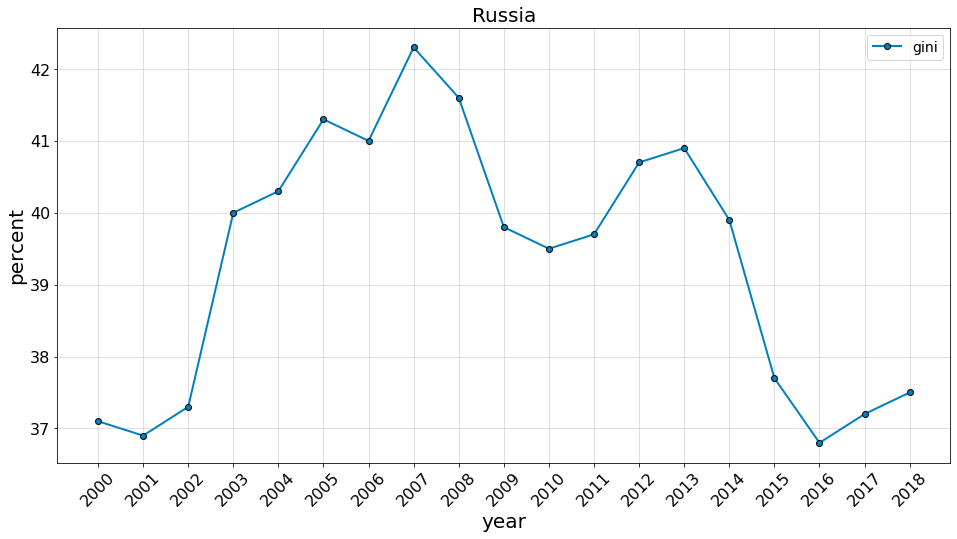

In [10]:
plotter.plot_indicators(region='Russia',
                        indicators=['gini'],
                        colors=get_colors(COLORS_DICT),
                        save=False)

## Target Indicator

### Poverty Rate

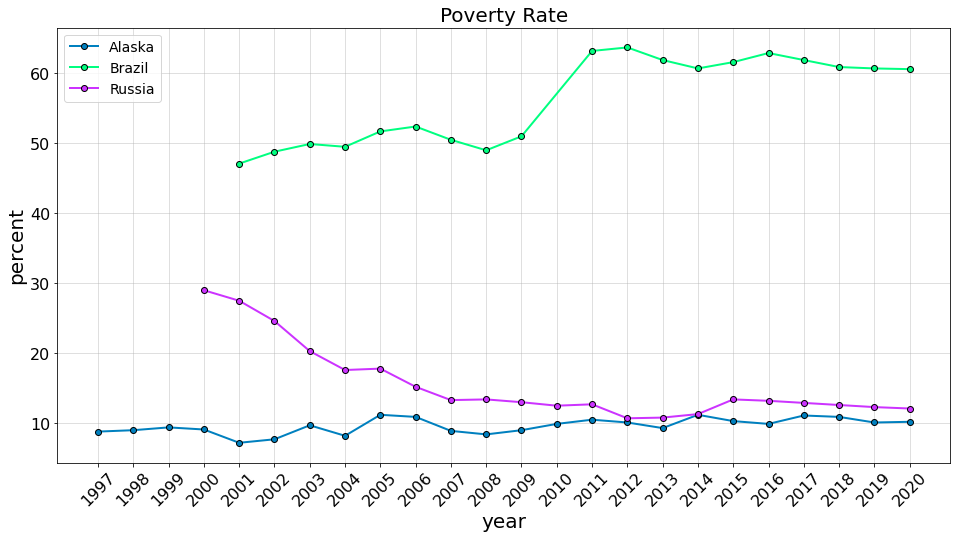

In [11]:
plotter.plot(indicator='poverty',
             regions=['Alaska', 'Brazil', 'Russia'],
             title='Poverty Rate',
             crop=None,
             colors=get_colors(COLORS_DICT),
             save=False)

## Model Features

### Inflation

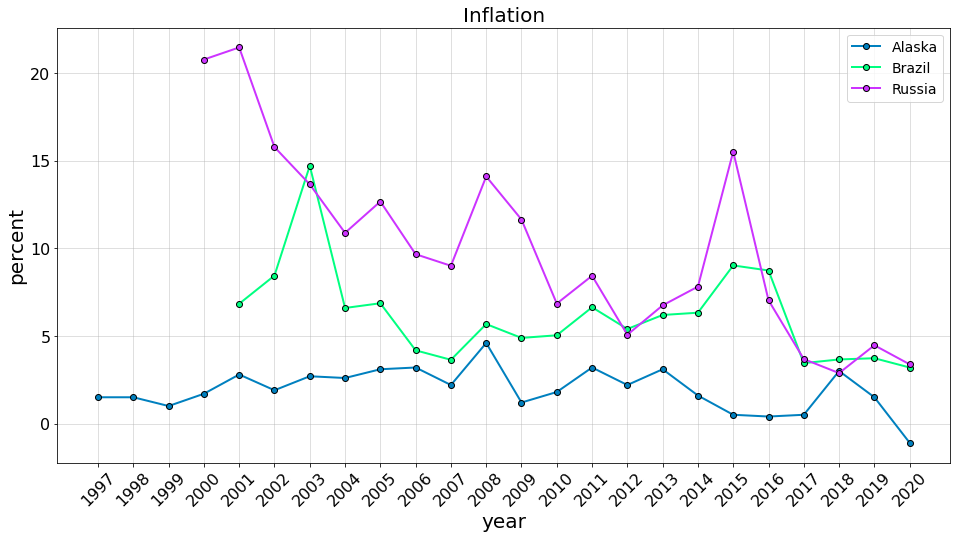

In [12]:
plotter.plot(indicator='inflation',
             regions=['Alaska', 'Brazil', 'Russia'],
             title='Inflation',
             crop=None,
             colors=get_colors(COLORS_DICT),
             save=False)

### Unemployment Rate

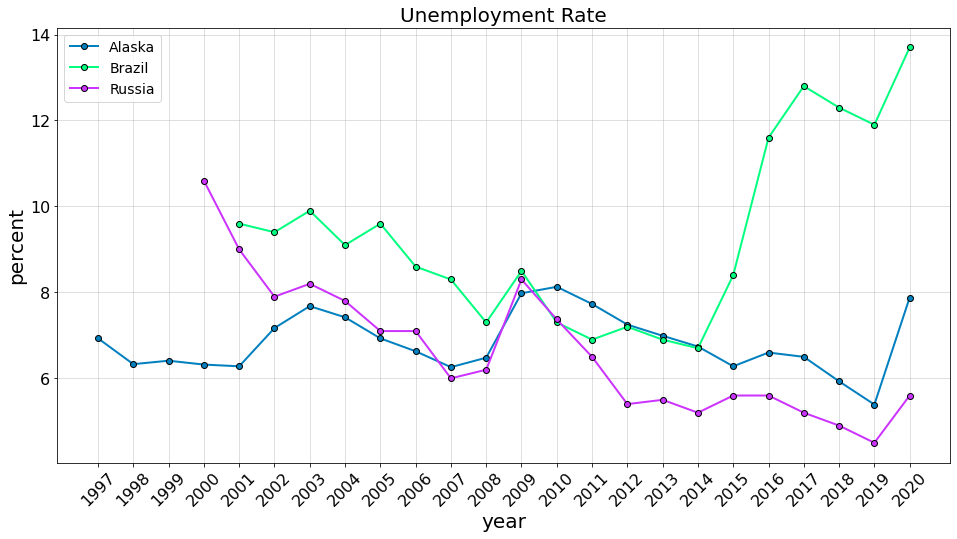

In [13]:
plotter.plot(indicator='unemployment',
             regions=['Alaska', 'Brazil', 'Russia'],
             title='Unemployment Rate',
             crop=None,
             colors=get_colors(COLORS_DICT),
             save=False)

#### GDP

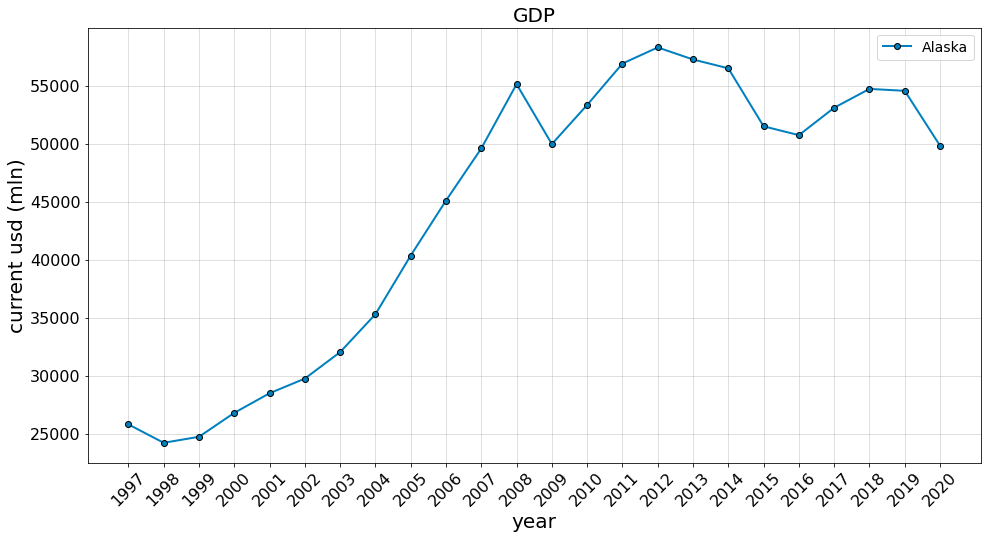

In [14]:
plotter.plot(indicator='gdp',
             regions=['Alaska'],
             title='GDP',
             crop=None,
             colors=get_colors(COLORS_DICT, color_names=['Alaska']),
             save=False)

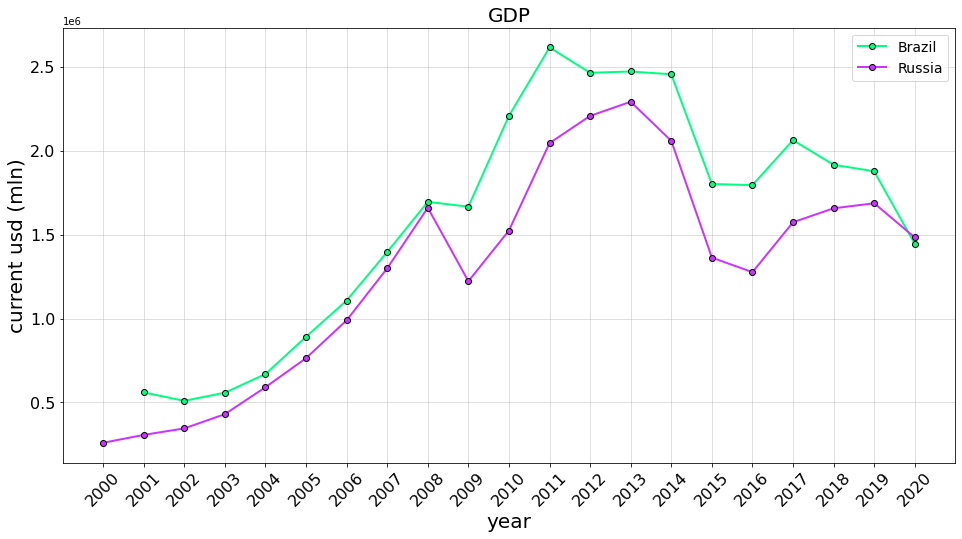

In [15]:
plotter.plot(indicator='gdp',
             regions=['Brazil', 'Russia'],
             title='GDP',
             crop=None,
             colors=get_colors(COLORS_DICT, color_names=['Brazil', 'Russia']),
             save=False)

#### Population

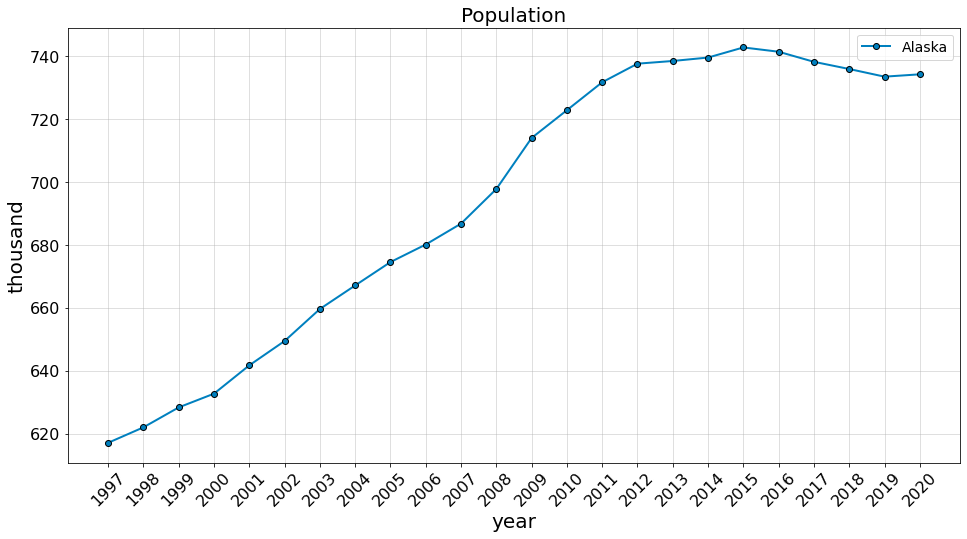

In [16]:
plotter.plot(indicator='population',
             regions=['Alaska'],
             title='Population',
             crop=None,
             colors=get_colors(COLORS_DICT, color_names=['Alaska']),
             save=False)

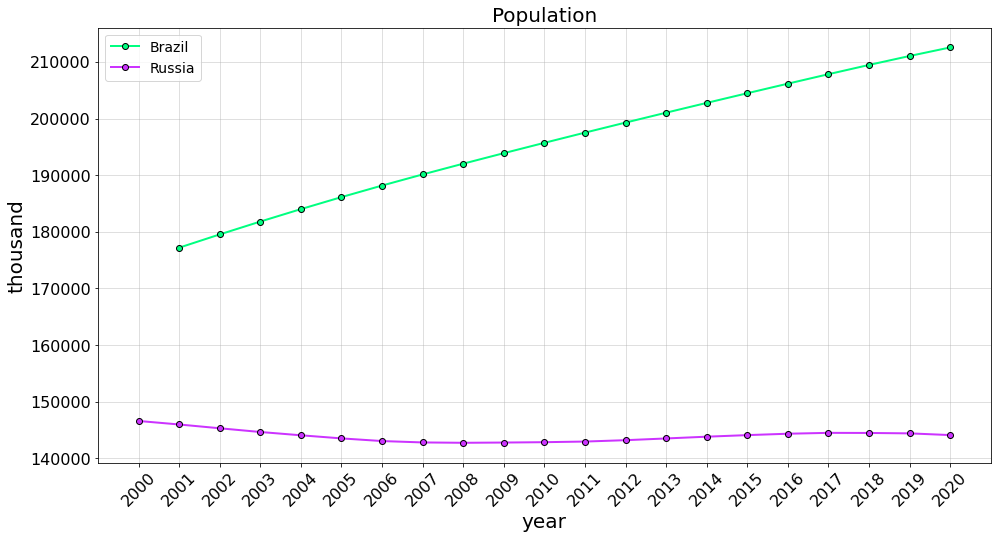

In [17]:
plotter.plot(indicator='population',
             regions=['Brazil', 'Russia'],
             title='Population',
             crop=None,
             colors=get_colors(COLORS_DICT, color_names=['Brazil', 'Russia']),
             save=False)

#### GDP per capita

In [18]:
for region in os.listdir(data_path):
    gdp = pd.read_csv(os.path.join(data_path, region, 'gdp.csv')) # current usd (mln)
    population = pd.read_csv(os.path.join(data_path, region, 'population.csv')) # thousand
    
    data = np.array([gdp[gdp.columns[0]].to_numpy(),
                     gdp[gdp.columns[1]].to_numpy() / (population[population.columns[1]].to_numpy() * 1000)]).T
    
    gdp_per_capita = pd.DataFrame(data=data,
                                  columns=list(gdp.columns))
    gdp_per_capita[gdp_per_capita.columns[0]] = gdp_per_capita[gdp_per_capita.columns[0]].astype(np.uint16)
    
    gdp_per_capita.to_csv(os.path.join(data_path, region, 'gdp_per_capita.csv'), index=False)

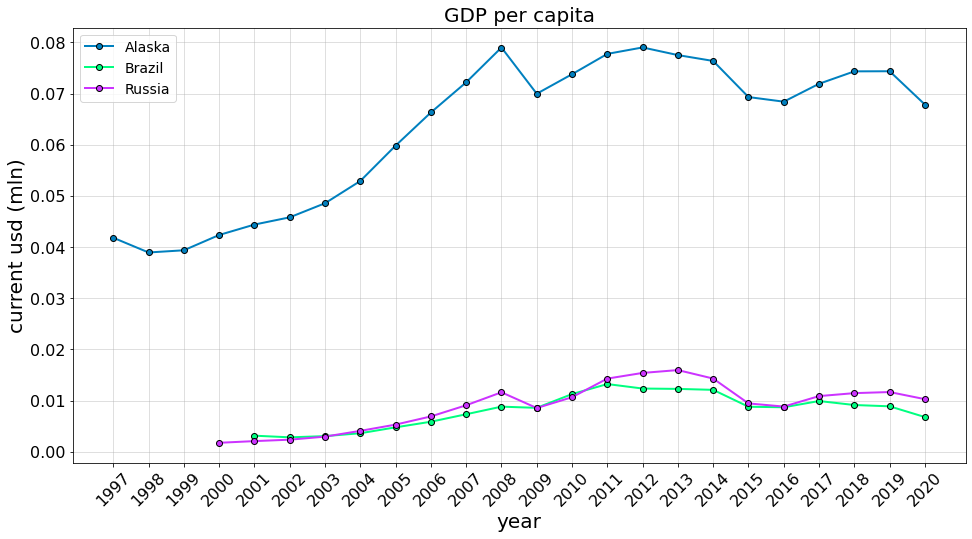

In [19]:
plotter.plot(indicator='gdp_per_capita',
             regions=['Alaska', 'Brazil', 'Russia'],
             title='GDP per capita',
             crop=None,
             colors=get_colors(COLORS_DICT),
             save=False)

###  GDP per capita Rate

In [20]:
for region in os.listdir(data_path):
    gdp_per_capita = pd.read_csv(os.path.join(data_path, region, 'gdp_per_capita.csv')) # current usd (mln)
    
    values = gdp_per_capita[gdp_per_capita.columns[1]].to_numpy()
    
    data = np.array([gdp_per_capita[gdp_per_capita.columns[0]].to_numpy()[1:],
                     (values[1:]/values[:-1]) * 100 - 100]).T
    
    gdp_per_capita_rate = pd.DataFrame(data=data,
                                       columns=[gdp_per_capita.columns[0], 'percent'])
    gdp_per_capita_rate[gdp_per_capita_rate.columns[0]] = gdp_per_capita_rate[gdp_per_capita_rate.columns[0]].astype(np.uint16)
    
    gdp_per_capita_rate.to_csv(os.path.join(data_path, region, 'gdp_per_capita_rate.csv'), index=False)

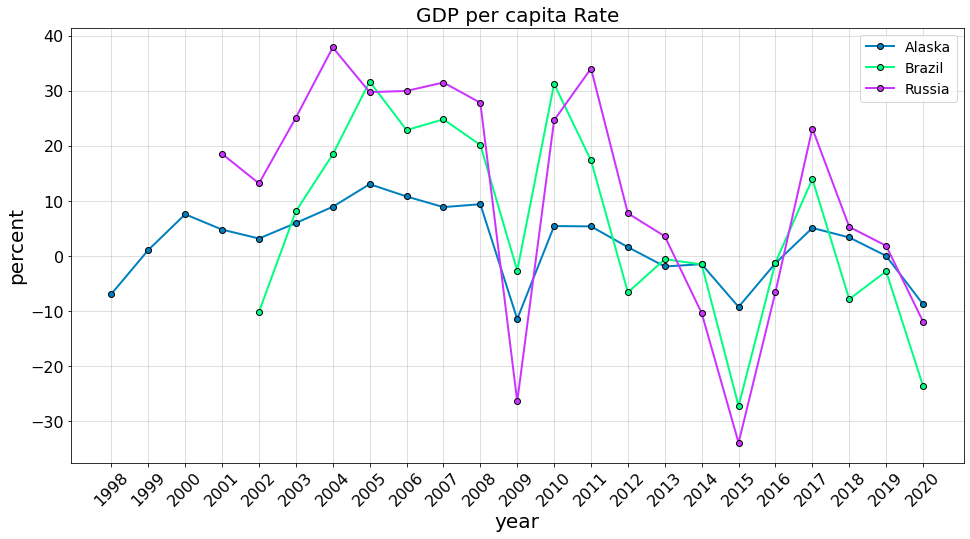

In [21]:
plotter.plot(indicator='gdp_per_capita_rate',
             regions=['Alaska', 'Brazil', 'Russia'],
             title='GDP per capita Rate',
             crop=None,
             colors=get_colors(COLORS_DICT),
             save=False)

#### UBI Payments

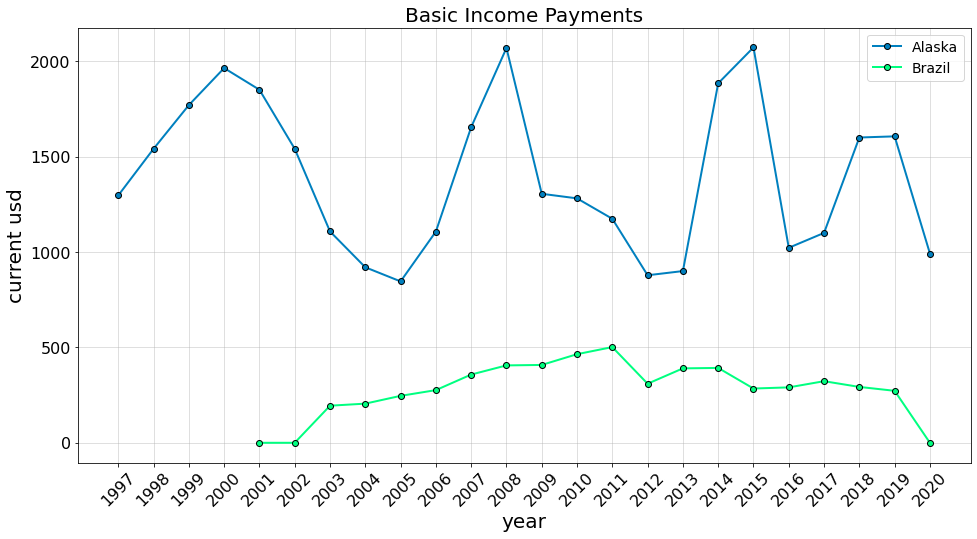

In [22]:
plotter.plot(indicator='payment',
             regions=['Alaska', 'Brazil'],
             title='Basic Income Payments',
             crop=None,
             colors=get_colors(COLORS_DICT),
             save=False)

#### Minimum Wage

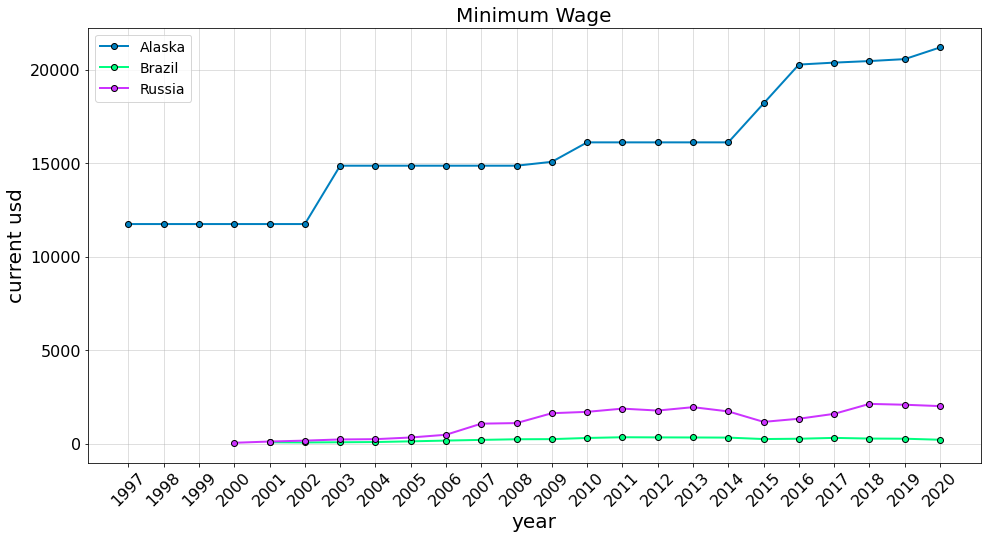

In [23]:
plotter.plot(indicator='minimum_wage',
             regions=['Alaska', 'Brazil', 'Russia'],
             title='Minimum Wage',
             crop=None,
             colors=get_colors(COLORS_DICT),
             save=False)

### Basic Income Payment in the Minimum Wage

In [24]:
for region in os.listdir(data_path):
    if region == 'Russia':
        continue
    
    payment = pd.read_csv(os.path.join(data_path, region, 'payment.csv')) # current usd
    minimum_wage = pd.read_csv(os.path.join(data_path, region, 'minimum_wage.csv')) # current usd
    
    data = np.array([payment[payment.columns[0]].to_numpy(),
                     payment[payment.columns[1]].to_numpy() / (minimum_wage[minimum_wage.columns[1]].to_numpy()) * 100]).T
    
    payment_in_minimum_wage = pd.DataFrame(data=data,
                                           columns=[payment.columns[0], 'percent'])
    payment_in_minimum_wage[payment_in_minimum_wage.columns[0]] = payment_in_minimum_wage[payment_in_minimum_wage.columns[0]].astype(np.uint16)
    
    payment_in_minimum_wage.to_csv(os.path.join(data_path, region, 'payment_in_minimum_wage.csv'), index=False)

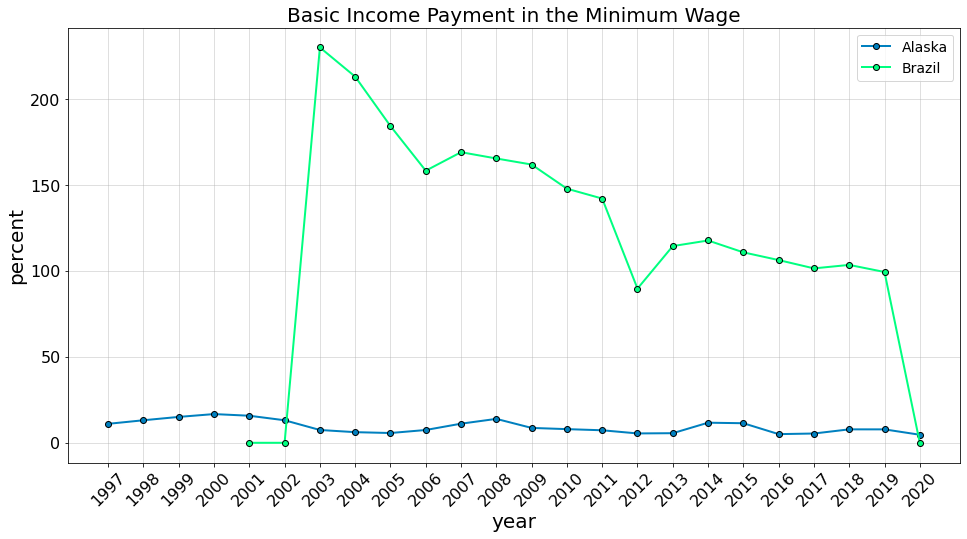

In [25]:
plotter.plot(indicator='payment_in_minimum_wage',
             regions=['Alaska', 'Brazil'],
             title='Basic Income Payment in the Minimum Wage',
             crop=None,
             colors=get_colors(COLORS_DICT),
             save=False)